In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import scipy.io
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

In [6]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=True)

font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}

mpl.rc('font', **font)

jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=1.5)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [7]:
#mpl.rcParams['text.usetex'] = False

In [8]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [9]:
range_short = [400, 450, 500, 550, 600, 650, 700]
range_long = [700, 750, 800, 850, 900, 950, 1000]

# Network

$$ \tau\frac{du}{dt} = -u + \theta(W_{uI}I - W_{uv}v + \eta_u) $$
$$ \tau\frac{dv}{dt} = -v + \theta(W_{vI}I - W_{vu}v + \eta_v) $$
$$ \tau\frac{dy}{dt} = -y + W_{yu}u - W_{yv}v + \eta_y $$

In [6]:
params = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 1,
              'tau': 100,
              'th': 0.7,
              'sigma': 0.01,}

In [7]:
def sigmoid(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

In [8]:
def network(state_init, t, I, params):
    # Unpack parameters of the simulation
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    th = params['th'] #The target (threshold) value of y
    sigma = params['sigma']

    u, v, y = state_init

    dudt = (-u + sigmoid(Wut * I - Wuv * v )) / tau *dt
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u )) / tau *dt
    dydt = (-y + u - v) / tau * dt

    return [dudt, dvdt, dydt]

In [9]:
def nullclines(I, u, v):
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    U = sigmoid(Wut * I - Wuv * v)
    V = sigmoid(Wvt * I - Wvu * u )
    y =  U - V
    return U,V, y

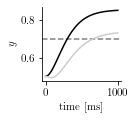

In [133]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt.subplots(1,1, figsize=(2.,1.8))
ax.axhline(0.7, linestyle='--', color='gray')

I1=0.55
I2= 0.75

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

ax.plot(t, s1[:,2],  color='k', label = str(I1))
ax.plot(t, s2[:,2],  color='#cccccc', label = str(I2))
#ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('time [ms]', fontdict=font)
ax.set_ylabel(r'$y$', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsexp_s.svg', bbox_inches='tight')

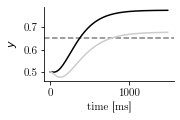

In [28]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1500
t = np.arange(0,T,dt)

fig, ax = plt.subplots(1,1, figsize=(2.7,1.8))
ax.axhline(0.65, linestyle='--', color='gray')

I1=0.71
I2= 0.8

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

ax.plot(t, s1[:,2],  color='k', label = str(I1))
ax.plot(t, s2[:,2],  color='#cccccc', label = str(I2))
#ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('time [ms]', fontdict=font)
ax.set_ylabel(r'$y$', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/interI_dyn/synamicsexp.svg', bbox_inches='tight')

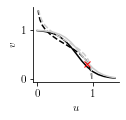

In [164]:
state_init = [0.9, 0.3, 0.5] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(2,1.8))

I1= 0.71
U,V,Y = nullclines(I1, u, v)

ax.plot(u, U,  color='k', label = str(I1))
ax.plot(V, v,   '--', color='k')

I2= 0.79
U,V,Y = nullclines(I2, u, v)

ax.plot(u, U,  color='#cccccc', label = str(I2))
ax.plot(V, v,  '--', color='#cccccc')
ax.plot(state_init[0], state_init[1], 'x', color='r')


plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
#plt.xlim(-0.1,1.2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('../report/figures/nullclines_inter.svg', bbox_inches='tight')

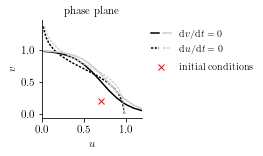

In [97]:
from matplotlib.legend_handler import HandlerTuple

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(1.8,1.8))
#fig = plt.figure(figsize=(1.1,1.1))
#ax = fig.add_subplot(111)

I1=0.71
U,V,Y = nullclines(I1, u, v)

l1, = ax.plot(u, U,  color='k', label = 'dv/dt = 0')
l2, = ax.plot(V, v, linestyle='--', dashes=(1.5, 1), color='k', label = 'du/dt = 0')

I2= 0.79
U,V,Y = nullclines(I2, u, v)

l3, = ax.plot(u, U,  color='#cccccc', label = 'dv/dt = 0')
l4, = ax.plot(V, v,linestyle='--', dashes=(1.5, 1), color='#cccccc', label = 'du/dt = 0')
p1 = ax.plot(state_init[0], state_init[1], 'x', color='r')
ax.set_title('phase plane', fontdict=font)


plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.xlim(0,1.2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.legend()
#ax.legend([(l1, l3), (l2, l4)], ['dv/dt = 0', 'du/dt = 0'], handler_map={tuple: HandlerTuple(ndivide=None)})
leg = ax.legend([(l1,l3), (l2,l4)],[r'$\mathrm{d} v / \mathrm{d}t = 0 $',r'$\mathrm{d} u / \mathrm{d}t = 0$'],  handler_map={tuple: HandlerTuple(ndivide=None)},
               bbox_to_anchor=(1, 1.), frameon=False,  prop={'size': 10})

leg2 = ax.legend(p1,['initial conditions'], bbox_to_anchor=(1, 0.65), frameon=False,  prop={'size': 10})
# Manually add the first legend back
ax.add_artist(leg)

plt.savefig('../report/figures/interI_dyn/nullclines.svg', bbox_inches='tight')

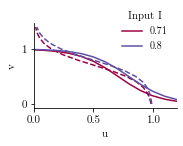

In [45]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(2.8,2.3))

I1=0.71
U,V,Y = nullclines(I1, u, v)

ax.plot(u, U,  color=colors_short[0], label = str(I1))
ax.plot(V, v,   '--', color=colors_short[0])

I2= 0.8
U,V,Y = nullclines(I2, u, v)

ax.plot(u, U,  color=colors_long[-1], label = str(I2))
ax.plot(V, v,  '--', color=colors_long[-1])

plt.xlim(0,1.2)

plt.xlabel('u')
plt.ylabel('v')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 10})

plt.tight_layout()

plt.savefig('../report/figures/nullclines_range.png', dpi=500, bbox_inches='tight')

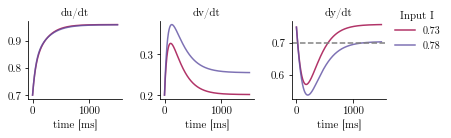

In [44]:
state_init = [0.7, 0.2, 0.75] #u, v, y
dt = params['dt']
T = 1500
t = np.arange(0,T,dt)

I1=0.73
I2= 0.78

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')


ax[0].plot(t, s1[:,0], color=colors_short[0], alpha=0.8)
ax[1].plot(t, s1[:,1],  color=colors_short[0], alpha=0.8)
ax[2].plot(t, s1[:,2],  color=colors_short[0], alpha=0.8, label = '0.73')
ax[0].plot(t, s2[:,0], color=colors_long[-1], alpha=0.8)
ax[1].plot(t, s2[:,1],  color=colors_long[-1], alpha=0.8)
ax[2].plot(t, s2[:,2],  color=colors_long[-1], alpha=0.8, label = '0.78')
ax[2].axhline(0.7, linestyle='--', color='gray')
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 10})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)

plt.tight_layout()
#plt.savefig('../report/figures/.svg', dpi=500, bbox_inches='tight')

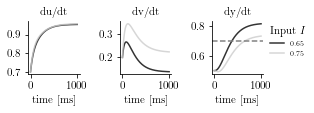

In [52]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

I1=0.65
I2= 0.75

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

fig, ax = plt. subplots(1,3, figsize=(4.5,1.7))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')


ax[0].plot(t, s1[:,0], color='k', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='k', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='k', alpha=0.8, label = '0.65')
ax[0].plot(t, s2[:,0], color='#cccccc', alpha=0.8)
ax[1].plot(t, s2[:,1],  color='#cccccc', alpha=0.8)
ax[2].plot(t, s2[:,2],  color='#cccccc', alpha=0.8, label = '0.75')
ax[2].axhline(0.7, linestyle='--', color='gray')
leg = ax[2].legend(bbox_to_anchor=(1., 1.), title='Input I', frameon=False,  prop={'size': 7})
leg.set_title('Input '+r'$I$',prop={'size':11})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamics_uvy.svg', dpi=500, bbox_inches='tight')

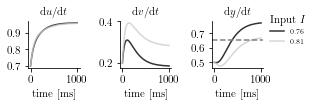

In [53]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

I1=0.71
I2= 0.8

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

fig, ax = plt. subplots(1,3, figsize=(4.5,1.7))
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

ax[0].plot(t, s1[:,0], color='k', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='k', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='k', alpha=0.8, label = '0.76')
ax[0].plot(t, s2[:,0], color='#cccccc', alpha=0.8)
ax[1].plot(t, s2[:,1],  color='#cccccc', alpha=0.8)
ax[2].plot(t, s2[:,2],  color='#cccccc', alpha=0.8, label = '0.81')
ax[2].axhline(0.65, linestyle='--', color='gray')
leg = ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input '+r'$I$', frameon=False,  prop={'size': 7})
leg.set_title('Input '+r'$I$',prop={'size':11})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/interI_dyn/dynamics.svg', dpi=500, bbox_inches='tight')

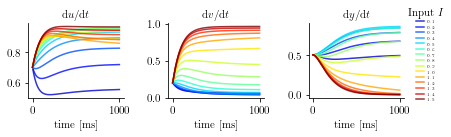

In [54]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2))
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.1,1.6,0.1):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input '+r'$I$', frameon=False,  prop={'size': 4})
leg.set_title('Input '+r'$I$',prop={'size':11})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsI.svg', dpi=500, bbox_inches='tight')

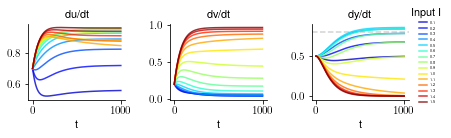

In [25]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
params['tau'] = 80
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.8, linestyle='--', color='lightgray')

for i in np.arange(0.1,1.6,0.1):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

plt.tight_layout()

# low, intermediate and high regimes of I

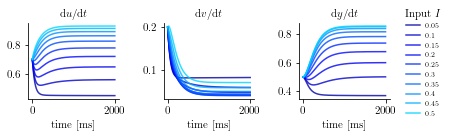

In [55]:
#low regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2)) #(6.4,2.2)
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.05,0.55,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)
    
'''s1 = odeint(network, state_init, t, args=(0.55, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(0.55))'''

leg = ax[2].legend(bbox_to_anchor=(1.1, 1.25), title='Input '+r'$I$', frameon=False,  prop={'size': 7}) #4
leg.set_title('Input '+r'$I$',prop={'size':11})
    
plt.tight_layout()
plt.savefig('../report/figures/lowI.svg', dpi=500, bbox_inches='tight')

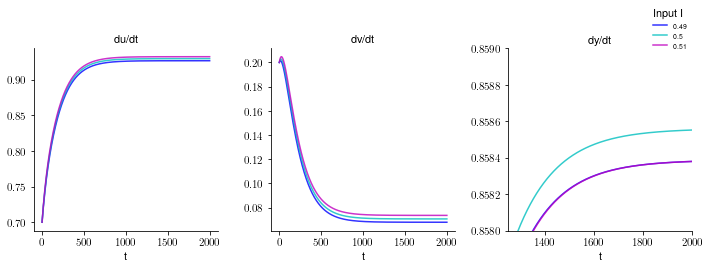

In [79]:
#imtermediate regime

state_init = [0.7, 0.2, 0.8] #u, v, y
PARAMS_DICT['tau'] = 100
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.65, linestyle='--', color='lightgray')

for j,i in enumerate([0.49,0.5,0.51]):
    c = ['b','c','m'][j]
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
ax[2].set_ylim(0.858,0.859)
ax[2].set_xlim(1250,2000)

plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

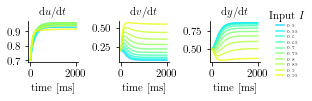

In [56]:
#imtermediate regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 2000
t = np.arange(0,T,dt)
I = np.arange(0.5,1.0,0.05) #np.arange(0.5,0.8,0.02)

gradients = []

fig, ax = plt. subplots(1,3, figsize=(4.5,1.7)) #(6.4,2.2)
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in I:
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    gradients.append(np.gradient(s1[:,2]))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))
    #ax[3].plot(np.gradient(s1[:,2]), color=c)

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)
'''    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))'''

leg = ax[2].legend(bbox_to_anchor=(1.1, 1.3), title='Input '+r'$I$', frameon=False,  prop={'size': 4}) #4
leg.set_title('Input '+r'$I$',prop={'size':11})
    
plt.tight_layout()
plt.savefig('../report/figures/interI_dyn/intermediateI.svg', dpi=500, bbox_inches='tight')

In [ ]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 2000
t = np.arange(0,T,dt)
I = np.arange(0.5,1.0,0.05) #np.arange(0.5,0.8,0.02)

gradients = []

fig, ax = plt. subplots(1,3, figsize=(4.5,1.7)) #(6.4,2.2)
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in I:
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    gradients.append(np.gradient(s1[:,2]))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))
    #ax[3].plot(np.gradient(s1[:,2]), color=c)

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)
'''    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))'''

leg = ax[2].legend(bbox_to_anchor=(1.1, 1.3), title='Input '+r'$I$', frameon=False,  prop={'size': 4}) #4
leg.set_title('Input '+r'$I$',prop={'size':11})
    
plt.tight_layout()

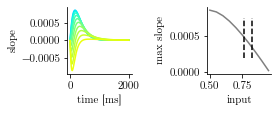

In [68]:
I = np.arange(0.5,1.0,0.05) #np.arange(0.5,0.8,0.02)
gradients = []

fig, ax = plt. subplots(1,2, figsize=(4.,1.7))

for i in I:
    s1 = odeint(network, state_init, t, args=(i, params))
    c = scalarMap.to_rgba(i)
    gradients.append(np.gradient(s1[:,2]))
    ax[0].plot(np.gradient(s1[:,2]), color=c)

ax[0].set_xlabel('time [ms]', fontdict=font)
ax[0].set_ylabel('slope', fontdict=font)

max_grad = []
for i in range(len(gradients)):
    if gradients[i][1] < 0:
        max_grad.append(np.max(gradients[i][int(np.where(np.diff(np.sign(gradients[i])))[0]):500]))
    else:
        max_grad.append(np.max(gradients[i][:500]))
        
ax[1].plot(I, max_grad, 'grey')
ax[1].vlines( 0.76, 0.0002, 0.00075, 'k', '--')
ax[1].vlines( 0.82, 0.0002, 0.00075, 'k', '--')
ax[1].set_xlabel('input', fontdict=font)
ax[1].set_ylabel('max slope', fontdict=font)
    
for i in [0,1]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')

    
plt.tight_layout()
plt.savefig('../report/figures/interI_dyn/gradient.svg', dpi=500, bbox_inches='tight')

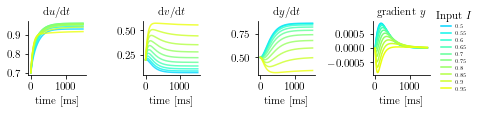

In [67]:
#imtermediate regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1500
t = np.arange(0,T,dt)
I = np.arange(0.5,1.0,0.05) #np.arange(0.5,0.8,0.02)

fig, ax = plt. subplots(1,4, figsize=(7.2,1)) #(6.4,2.2)
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
ax[3].set_title('gradient '+r'$y$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in I:
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8)
    ax[3].plot(np.gradient(s1[:,2]), color=c, label = str(i.round(2)))


for i in [0,1,2, 3]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)
'''    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))'''

leg = ax[3].legend(bbox_to_anchor=(1.8, 1.25), title='Input '+r'$I$', frameon=False,  prop={'size': 5}) #4
leg.set_title('Input '+r'$I$',prop={'size':11})
plt.subplots_adjust(wspace=1)
    
#plt.tight_layout()
plt.savefig('../report/figures/interI_dyn/intermediateI_gradient.svg', dpi=500, bbox_inches='tight')

In [68]:
gradients = []
for i in I:
    s1 = odeint(network, state_init, t, args=(i, params))
    gradients.append(np.gradient(s1[:,2]))

max_grad = []
for i in range(len(gradients)):
    if gradients[i][1] < 0:
        max_grad.append(np.max(gradients[i][int(np.where(np.diff(np.sign(gradients[i])))[0]):500]))
    else:
        max_grad.append(np.max(gradients[i][:500]))

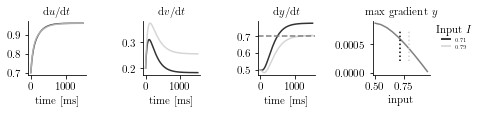

In [96]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1500
t = np.arange(0,T,dt)
th = 0.7

I1=0.71
I2= 0.78 #0.8

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

fig, ax = plt. subplots(1,4, figsize=(7.2,1))
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
ax[3].set_title('max gradient '+r'$y$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')


ax[0].plot(t, s1[:,0], color='k', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='k', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='k', alpha=0.8)
ax[0].plot(t, s2[:,0], color='#cccccc', alpha=0.8)
ax[1].plot(t, s2[:,1],  color='#cccccc', alpha=0.8)
ax[2].plot(t, s2[:,2],  color='#cccccc', alpha=0.8)
ax[2].axhline(th, linestyle='--', color='gray')
ax[3].plot(I, max_grad, 'grey')
ax[3].vlines( 0.71, 0.0002, 0.00075, 'k', 'dotted')
ax[3].vlines( 0.79, 0.0002, 0.00075, 'lightgrey', 'dotted')
ax[3].set_xlabel('input', fontdict=font)

dummy = ax[3].vlines( 0.76, 0, 0, 'k', label = '0.71')
dummy =ax[3].vlines( 0.76, 0, 0, 'lightgrey', label = '0.79')

leg = ax[3].legend(bbox_to_anchor=(1.8, 1.), title='Input '+r'$I$', frameon=False, prop={'size': 5})
leg.set_title('Input '+r'$I$',prop={'size':11})

for i in [0,1,2,3]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)
ax[3].set_xlabel('input', fontdict=font)
plt.subplots_adjust(wspace=1)
#plt.tight_layout()
plt.savefig('../report/figures/interI_dyn/dynamics_slope.svg', dpi=500, bbox_inches='tight')

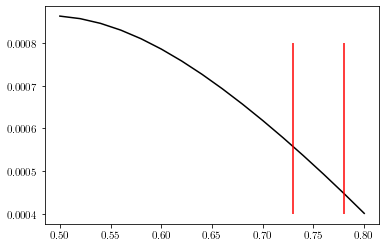

In [96]:
plt.plot(I, max_grad, 'k')
plt.vlines( 0.73, 0.0004, 0.0008, 'r')
plt.vlines( 0.78, 0.0004, 0.0008, 'r')

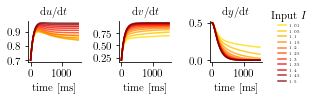

In [60]:
#high regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1500
t = np.arange(0,T,dt)
I = [1.01, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]

fig, ax = plt. subplots(1,3, figsize=(4.5,1.7)) #(6.4,2.2)
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in I:
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)

leg = ax[2].legend(bbox_to_anchor=(1.1, 1.3), title='Input '+r'$I$', frameon=False,  prop={'size': 4}) #4
leg.set_title('Input '+r'$I$',prop={'size':11})

plt.subplots_adjust(wspace = 1)
    
plt.tight_layout()
plt.savefig('../report/figures/highI_dyn/highI.svg', dpi=500, bbox_inches='tight')

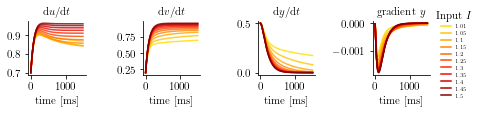

In [61]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1500
t = np.arange(0,T,dt)
I = [1.01, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]

fig, ax = plt. subplots(1,4, figsize=(7.2,1)) #(6.4,2.2)
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
ax[3].set_title('gradient '+r'$y$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in I:
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8)
    ax[3].plot(np.gradient(s1[:,2]), color=c, label = str(i))


for i in [0,1,2, 3]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)
'''    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))'''

leg = ax[3].legend(bbox_to_anchor=(1.8, 1.25), title='Input '+r'$I$', frameon=False,  prop={'size': 5}) #4
leg.set_title('Input '+r'$I$',prop={'size':11})
plt.subplots_adjust(wspace=1)
    
#plt.tight_layout()
plt.savefig('../report/figures/highI_dyn/highI_gradient.svg', dpi=500, bbox_inches='tight')

In [15]:
#1.081, 1.017
state_init = [0.7, 0.2, 0.5]
gradients = []
I = [1.015, 1.01, 1.05, 1.1, 1.15, 1.2, 1.25]
for i in I:
    s1 = odeint(network, state_init, t, args=(i, params))
    gradients.append(np.gradient(s1[:,2]))
max_grad = []
for i in range(len(gradients)):
    max_grad.append(np.min(gradients[i][:500]))

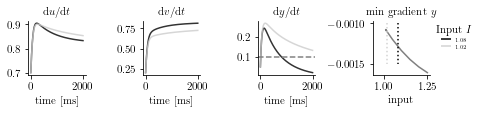

In [20]:
state_init = [0.7, 0.2, 0.05] #u, v, y
dt = params['dt']
T = 2000
t = np.arange(0,T,dt)
th = 0.1

I1= 1.081 #1.081
I2= 1.017 #1.017

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

fig, ax = plt. subplots(1,4, figsize=(7.2,1))
ax[0].set_title(r'$\mathrm{d} u / \mathrm{d}t$', fontdict=font)
ax[1].set_title(r'$\mathrm{d} v / \mathrm{d}t$', fontdict=font)
ax[2].set_title(r'$\mathrm{d} y / \mathrm{d}t$', fontdict=font)
ax[3].set_title('min gradient '+r'$y$', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')


ax[0].plot(t, s1[:,0], color='k', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='k', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='k', alpha=0.8)
ax[0].plot(t, s2[:,0], color='#cccccc', alpha=0.8)
ax[1].plot(t, s2[:,1],  color='#cccccc', alpha=0.8)
ax[2].plot(t, s2[:,2],  color='#cccccc', alpha=0.8)
ax[2].axhline(th, linestyle='--', color='gray')
ax[3].plot(I, max_grad, 'grey')
ax[3].vlines( 1.081, -0.001, -0.0015, 'k', 'dotted')
ax[3].vlines( 1.017, -0.001, -0.0015, 'lightgrey', 'dotted')
ax[3].set_xlabel('input', fontdict=font)

dummy = ax[3].vlines( 0.95, -0.001, -0.001, 'k', label = '1.08')
dummy = ax[3].vlines( 0.95, -0.001, -0.001, 'lightgrey', label = '1.02')

leg = ax[3].legend(bbox_to_anchor=(1.8, 1.), title='Input '+r'$I$', frameon=False, prop={'size': 5})
leg.set_title('Input '+r'$I$',prop={'size':11})

for i in [0,1,2,3]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('time [ms]', fontdict=font)
ax[3].set_xlabel('input', fontdict=font)
plt.subplots_adjust(wspace=1)
#plt.tight_layout()
plt.savefig('../report/figures/highI_dyn/dynamics_slope.svg', dpi=500, bbox_inches='tight')

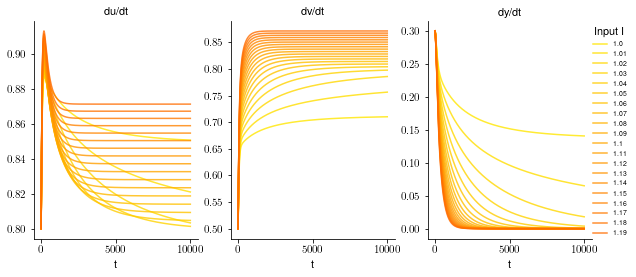

In [15]:
#high regime

state_init = [0.8, 0.5, 0.3] #u, v, y
dt = params['dt']
T = 10000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(1.0,1.2,0.01):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1.25, 1.), title='Input I', frameon=False,  prop={'size': 7}) #4
    
#plt.tight_layout()
#plt.savefig('../report/figures/highI.png', dpi=500, bbox_inches='tight')

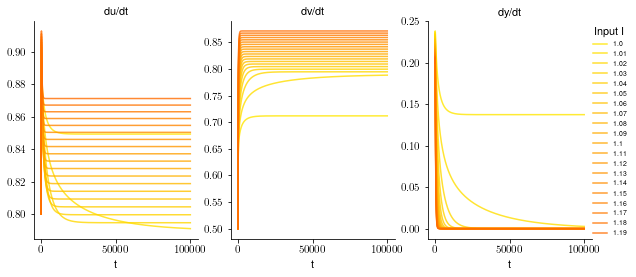

In [96]:
state_init = [0.8, 0.5, 0.2] #u, v, y
dt = 100
T = 100000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(1.0,1.2,0.01):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1.25, 1.), title='Input I', frameon=False,  prop={'size': 7})

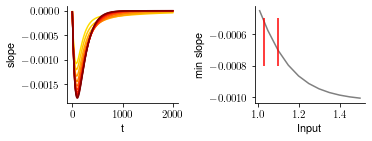

In [148]:
I = [1.01, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]
gradients = []

fig, ax = plt. subplots(1,2, figsize=(4,1.7))

for i in I:
    s1 = odeint(network, state_init, t, args=(i, params))
    c = scalarMap.to_rgba(i)
    gradients.append(np.gradient(s1[:,2]))
    ax[0].plot(np.gradient(s1[:,2]), color=c)

ax[0].set_xlabel('time [ms]', fontdict=font)
ax[0].set_ylabel('slope', fontdict=font)

min_grad = []
for i in range(len(gradients)):
    min_grad.append(np.min(gradients[i][250:500]))
        
ax[1].plot(I, min_grad, 'grey')
ax[1].vlines( 1.1, -0.0008, -0.0005, 'r')
ax[1].vlines( 1.03, -0.0008, -0.0005, 'r')
ax[1].set_xlabel('Input', fontdict=font)
ax[1].set_ylabel('min slope', fontdict=font)
    
for i in [0,1]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')

    
plt.tight_layout()
#plt.savefig('../report/figures/intermediateI_gradient.png', dpi=500, bbox_inches='tight')

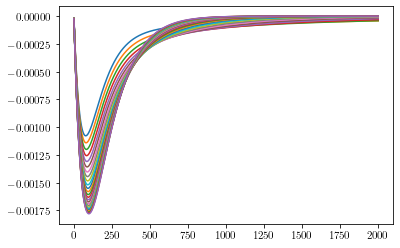

In [97]:
gradients = []
I = np.arange(1.01,1.5,0.02)
for i in I:
    s1 = odeint(network, state_init, t, args=(i, params))
    gradients.append(np.gradient(s1[:,2]))

for i in range(len(gradients)):
    plt.plot(gradients[i])

In [98]:
min_grad = []
for i in range(len(gradients)):
    min_grad.append(np.min(gradients[i][250:500]))

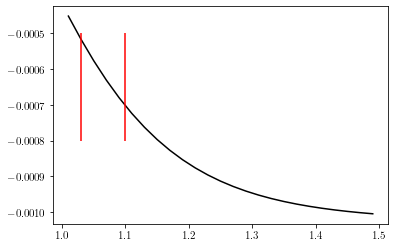

In [107]:
plt.plot(I, min_grad, 'k')
plt.vlines( 1.1, -0.0008, -0.0005, 'r')
plt.vlines( 1.03, -0.0008, -0.0005, 'r')

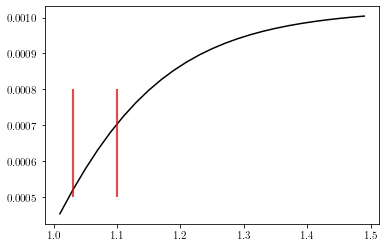

In [108]:
plt.plot(I, np.abs(min_grad), 'k')
plt.vlines( 1.1, 0.0008, 0.0005, 'r')
plt.vlines( 1.03, 0.0008, 0.0005, 'r')

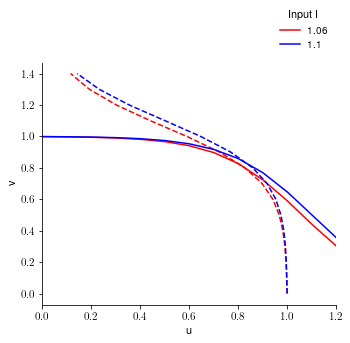

In [106]:
state_init = [0.8, 0.5, 0.3] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(5,5)) #2.8,2.3

I1=1.06

U,V,Y = nullclines(I1, u, v)

ax.plot(u, U,  color='r', label = str(I1))
ax.plot(V, v,   '--', color='r')

I2= 1.1
U,V,Y = nullclines(I2, u, v)

ax.plot(u, U,  color='b', label = str(I2))
ax.plot(V, v,  '--', color='b')

plt.xlim(0,1.2)

plt.xlabel('u')
plt.ylabel('v')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 10})

plt.tight_layout()

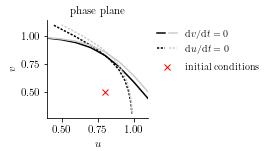

In [64]:
state_init = [0.8, 0.5, 0.3] #u, v, y
dt = params['dt']
u = np.arange(0.3,1.2,0.1)
v = np.arange(0.3,1.2,0.1)

fig, ax = plt. subplots(1,1, figsize=(1.8,1.8))
#fig = plt.figure(figsize=(1.1,1.1))
#ax = fig.add_subplot(111)

I1=1.06
U,V,Y = nullclines(I1, u, v)

l1, = ax.plot(u, U,  color='k', label = 'dv/dt = 0')
l2, = ax.plot(V, v, linestyle='--', dashes=(1.5, 1), color='k', label = 'du/dt = 0')

I2= 1.1
U,V,Y = nullclines(I2, u, v)

l3, = ax.plot(u, U,  color='#cccccc', label = 'dv/dt = 0')
l4, = ax.plot(V, v,linestyle='--', dashes=(1.5, 1), color='#cccccc', label = 'du/dt = 0')
p1 = ax.plot(state_init[0], state_init[1], 'x', color='r')
ax.set_title('phase plane', fontdict=font)


plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.xlim(0.4,1.1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.legend()
#ax.legend([(l1, l3), (l2, l4)], ['dv/dt = 0', 'du/dt = 0'], handler_map={tuple: HandlerTuple(ndivide=None)})
leg = ax.legend([(l1,l3), (l2,l4)],[r'$\mathrm{d} v / \mathrm{d}t = 0 $',r'$\mathrm{d} u / \mathrm{d}t = 0$'],  handler_map={tuple: HandlerTuple(ndivide=None)},
               bbox_to_anchor=(1, 1.), frameon=False,  prop={'size': 10})
leg2 = ax.legend(p1,['initial conditions'], bbox_to_anchor=(1, 0.65), frameon=False,  prop={'size': 10})
# Manually add the first legend back
ax.add_artist(leg)

plt.savefig('../report/figures/nullclines_highI.png', dpi=500, bbox_inches='tight')

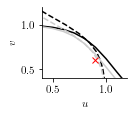

In [160]:
state_init = [0.9, 0.6, 0.5] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(2,1.8))

I1=1.081
U,V,Y = nullclines(I1, u, v)

ax.plot(u, U,  color='k', label = str(I1))
ax.plot(V, v,   '--', color='k')

I2= 1.017
U,V,Y = nullclines(I2, u, v)

ax.plot(u, U,  color='#cccccc', label = str(I2))
ax.plot(V, v,  '--', color='#cccccc')
ax.plot(state_init[0], state_init[1], 'x', color='r')


plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.xlim(0.4,1.2)
plt.ylim(0.4,1.2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('../report/figures/highI_dyn/nullclines.svg', bbox_inches='tight')

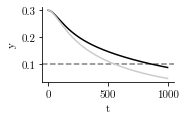

In [27]:
state_init = [0.8, 0.5, 0.3] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,1, figsize=(2.7,1.8))
ax.axhline(0.1, linestyle='--', color='gray')

I1=1.081
I2= 1.0

s1 = odeint(network, state_init, t, args=(I1, params))
s2 = odeint(network, state_init, t, args=(I2, params))

ax.plot(t, s1[:,2],  color='k', label = str(I1))
ax.plot(t, s2[:,2],  color='#cccccc', label = str(I2))
#ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('time [ms]', fontdict=font)
ax.set_ylabel('y', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsexp_high).svg', dpi=500, bbox_inches='tight')

## changing parameter

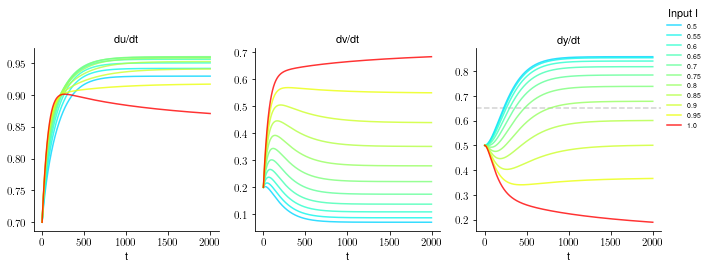

In [65]:
#imtermediate regime

state_init = [0.7, 0.2, 0.5] #u, v, y
PARAMS_DICT['tau'] = 100
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.65, linestyle='--', color='lightgray')

for i in np.arange(0.5,1.0,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)
    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

# Mean Dynamics

### Intermediate I

In [2]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot
from onetwogo.plot import SortedPlot

%load_ext autoreload
%autoreload 2

In [3]:
def mean_I(sorted_data):
    mean_I = []
    for s in range(7):
        summe = 0
        for i in range(len(sorted_data.I_sorted[s])):
            summe += sorted_data.I_sorted[s][i][1][0]
        mean_I.append(summe/len(sorted_data.I_sorted[s]))
    return mean_I

In [10]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)
stimulus_mid = np.loadtxt('stimlst_mid_550_850.txt', dtype=int)

In [20]:
range_short = [400, 450, 500, 550, 600, 650, 700]
range_long = [700, 750, 800, 850, 900, 950, 1000]
range_mid = [550, 600, 650, 700, 750, 800, 850]

In [15]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

In [13]:
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.7)
expsimS = ExperimentSimulation(params)

K = 13
exp_resultS = expsimS.simulate(stimulus_short, K)

print(exp_resultS.simulation[:,3].mean())
print(exp_resultS.simulation[:,3].std())
print(exp_resultS.simulation[:,3].min())
print(exp_resultS.simulation[70+75+50+3:,3].max())

0.751099446410837
0.013436661585159876
0.7200203909370276
0.7768355362724262


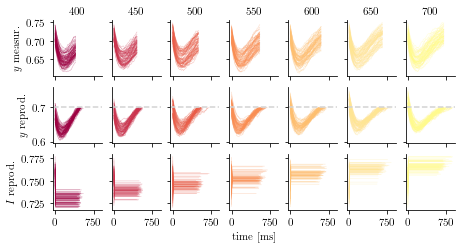

In [27]:
plot = SortedPlot(exp_resultS.create_sorted_data(2))
plot.plot_sorted()
plt.savefig('../report/figures/interI_dyn/short130mse.svg', dpi=500, bbox_inches='tight')

In [14]:
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.7)
expsimL = ExperimentSimulation(params)

K = 10
exp_resultL = expsimL.simulate(stimulus_long, K)

print(exp_resultL.simulation[:,3].mean())
print(exp_resultL.simulation[:,3].std())
print(exp_resultL.simulation[:,3].min())
print(exp_resultL.simulation[70+75+90+3:,3].max())

0.7720029196592704
0.005129483196020768
0.7563981664466558
0.7854365764699369


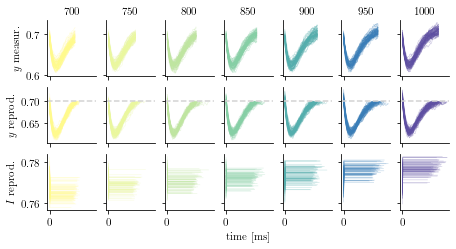

In [29]:
#plot = exp_result.create_sorted_plot()
plot = SortedPlot(exp_resultL.create_sorted_data(2))
plot.plot_sorted()
plt.savefig('../report/figures/interI_dyn/long130mse.svg', dpi=500, bbox_inches='tight')

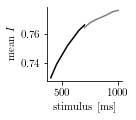

In [30]:
fig, ax = plt.subplots(1,1, figsize=(2.,1.8))

ax.plot(range_short, mean_I(exp_resultS.create_sorted_data(2)), c='k')
ax.plot(range_long, mean_I(exp_resultL.create_sorted_data(2)), c='grey')

ax.set_xlabel('stimulus [ms]', fontdict=font)
ax.set_ylabel('mean '+r'$I$')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.savefig('../report/figures/interI_dyn/input_stim_130mse.svg', dpi=500, bbox_inches='tight')

0.7644588897700487
0.0074764886743667975
0.7445664212395723
0.7810617191820697


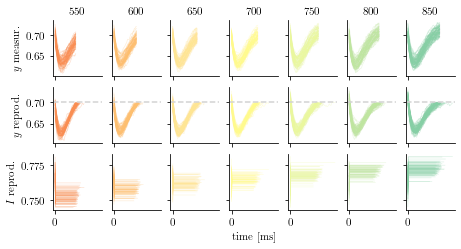

In [11]:
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.7)
expsimL = ExperimentSimulation(params)

K = 10.5
exp_resultM = expsimL.simulate(stimulus_mid, K)

print(exp_resultM.simulation[:,3].mean())
print(exp_resultM.simulation[:,3].std())
print(exp_resultM.simulation[:,3].min())
print(exp_resultM.simulation[70+75+90+3:,3].max())

plot = SortedPlot(exp_resultM.create_sorted_data(2))
plot.plot_sorted()

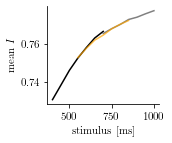

In [25]:
fig, ax = plt.subplots(1,1, figsize=(2.,1.8))

ax.plot(range_short, mean_I(exp_resultS.create_sorted_data(2)), c='k')
ax.plot(range_long, mean_I(exp_resultL.create_sorted_data(2)), c='grey')
ax.plot(range_mid, mean_I(exp_resultM.create_sorted_data(2)), c='orange', alpha=0.7)

ax.set_xlabel('stimulus [ms]', fontdict=font)
ax.set_ylabel('mean '+r'$I$')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### High I

In [ ]:
1.081, 1.017

In [148]:
params = Params(Iinit=1.02, ntrials=500, delay=700, tau=60, sigma=0.02, th=0.1, IF=-500)
expsimS = ExperimentSimulation(params)

K = 4
exp_resultS = expsimS.simulate(stimulus_short, K)

print(exp_resultS.simulation[:,3].mean())
print(exp_resultS.simulation[:,3].std())
print(exp_resultS.simulation[:,3].min())
print(exp_resultS.simulation[70+75+50+3:,3].max())
print(exp_resultS.simulation[70+75+50+3:,3].min())

1.0499010447473394
0.011142797982750861
1.02
1.0774696026337733
1.0248225357467604


In [115]:
print(exp_resultS.simulation[:,3].max())

1.08044269467402


In [116]:
print(exp_resultS.simulation[:,1].mean())

0.7301402138734686


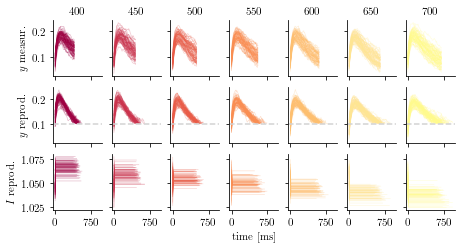

In [155]:
plot = SortedPlot(exp_resultS.create_sorted_data(2))
plot.plot_sorted()
plt.savefig('../report/figures/highI_dyn/short60mse.svg', dpi=500, bbox_inches='tight')

In [149]:
params = Params(Iinit=1.02, ntrials=500, delay=700, tau=60, sigma=0.02, th=0.1, IF=-500)
expsimL = ExperimentSimulation(params)

K = 2.5
exp_resultL = expsimL.simulate(stimulus_long, K)
print(exp_resultL.simulation[:,3].mean())
print(exp_resultL.simulation[:,3].std())
print(exp_resultL.simulation[:,3].min())
print(exp_resultL.simulation[70+75+90+3:,3].max())
print(exp_resultL.simulation[70+75+90+3:,3].min())

1.0331991657105661
0.005016275226451317
1.02
1.0455376398809675
1.0204477151876061


In [31]:
print(exp_resultL.simulation[:,3].min())

1.0169643822196548


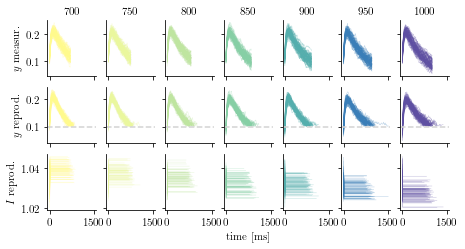

In [154]:
plot = SortedPlot(exp_resultL.create_sorted_data(2))
plot.plot_sorted()
plt.savefig('../report/figures/highI_dyn/long60mse.svg', dpi=500, bbox_inches='tight')

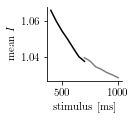

In [48]:
fig, ax = plt.subplots(1,1, figsize=(2.,1.8))

ax.plot(range_short, mean_I(exp_resultS.create_sorted_data(2)), c='k')
ax.plot(range_long, mean_I(exp_resultL.create_sorted_data(2)), c='grey')

ax.set_xlabel('stimulus [ms]', fontdict=font)
ax.set_ylabel('mean '+r'$I$')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.savefig('../report/figures/highI_dyn/input_stim_60mse.svg', dpi=500, bbox_inches='tight')